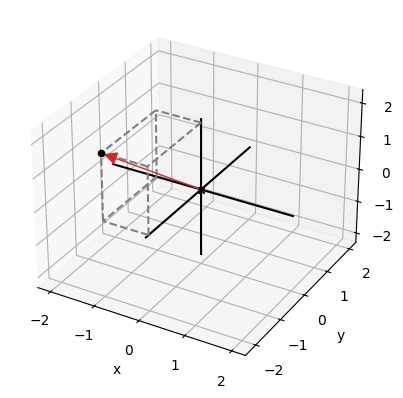

In [7]:
import sys
sys.path.append('../utils')
from draw3D import *
from colors import *
from draw2D import *
import math
import matplotlib

draw3d(
    Points3D((-1,-2,2)),
    Arrow3D((-1,-2,2)),
    Box3D(-1,-2,2)
)


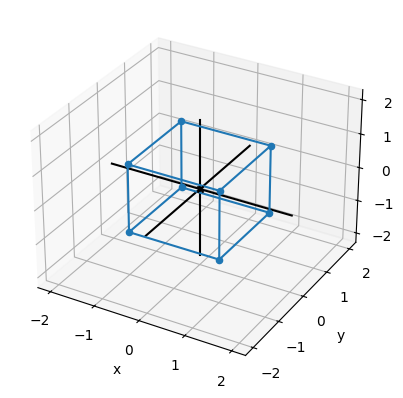

In [2]:
from itertools import product

pm1 = [1, -1]

# все вершины куба
vertices = list(product(pm1, repeat=3))

# рёбра вдоль оси X
edges = [((-1, y, z), (1, y, z)) for y, z in product(pm1, repeat=2)]
# рёбра вдоль оси Y
edges += [((x, -1, z), (x, 1, z)) for x, z in product(pm1, repeat=2)]
# рёбра вдоль оси Z
edges += [((x, y, -1), (x, y, 1)) for x, y in product(pm1, repeat=2)]

draw3d(
    Points3D(*vertices, color=BLUE),
    *[Segment3D(*edge) for edge in edges]
)


In [3]:
def add(*vectors):
    return tuple(map(sum, zip(*vectors)))

def scale(v, s):
    """
        Get the scalar product of a 2D vector by s.
    """
    return [coord * s for coord in v]

def subtract(u, v):
    return [coord1 - coord2 for coord1, coord2 in zip(u, v)]

def length(vector):
    return sum(map(lambda x: x**2, vector))**0.5


def vector_with_whole_length(max_coords = 100):
    for x in range(1, max_coords):
        for y in range(1, x + 1):
            for z in range(1, y + 1):
                if length((x, y, z)).is_integer():
                    yield (x, y, z)

# gen = vector_with_whole_length()

# for vectors in gen:
#     print(vectors)



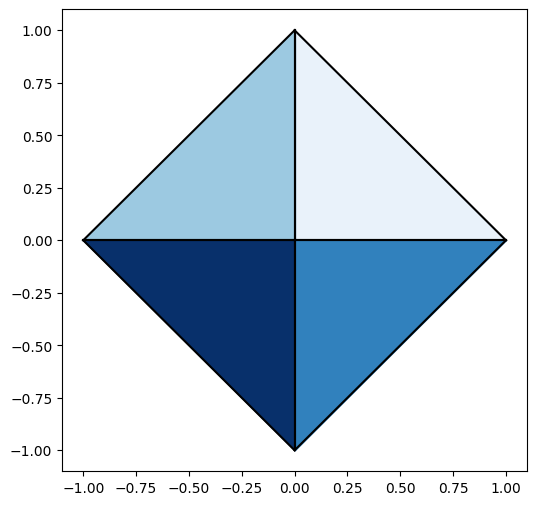

In [9]:
def dot(u, v): # Скалярное произведение
    return sum([coord1 * coord2 for coord1, coord2 in zip(u,v)])

def alt_dot(u, v, angle):
    return length(u) * length(v) * math.cos(angle * math.pi / 180)




def cross(u, v): # Векторное произведение
    ux, uy, uz = u
    vx, vy, vz = v 
    return (uy * vz -  uz*vy, uz*vx - ux*vz, ux*vy - uy * vx)


def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))


def component(v, direction):
    return (dot(v, direction) / length(direction))


def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))


def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

def unit(v):
    return scale(v, 1/length(v))


def normal(face):
    return cross(subtract(face[1], face[0]), subtract(face[2], face[0]))


def render(faces, light=(1,2,3), color_map=None, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            c = color_map(1 - dot(unit(normal(face)), unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2D(*polygons,axes=False, origin=False, grid=None)


octahedron = [
[(1,0,0), (0,1,0), (0,0,1)],
[(1,0,0), (0,0,-1), (0,1,0)],
[(1,0,0), (0,0,1), (0,-1,0)],
[(1,0,0), (0,-1,0), (0,0,-1)],
[(-1,0,0), (0,0,1), (0,1,0)],
[(-1,0,0), (0,1,0), (0,0,-1)],
[(-1,0,0), (0,-1,0), (0,0,1)],
[(-1,0,0), (0,0,-1), (0,-1,0)],
]


render(octahedron, color_map=matplotlib.colormaps.get_cmap('Blues'), lines=BLACK)
